<a href="https://colab.research.google.com/github/TamaraTarasenko/Visma/blob/main/December_Homework_of_Financial_market_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hi!

This is a notebook. It is an easy way to mix text and Python code. For example, you can just execute the cell below to print out "Hello world!".

In [1]:
print("Hello world!")

Hello world!


You can of course also do something more complicated if you like:

In [2]:
ten = 10
hundred = ten * ten
thousand = ten * hundred
thousand

1000

We will be using this notebook for all of the workshop. You can save your own copy of this notebook in your Google Drive and use it for future reference.

# Tools

Let's start by getting familiar with the tools that we will be using.

## Pandas

Pandas is a Python library to help us work with tabular data.

It is a very popular library, which means there is a lot of people who can help you on sites like Stack Overflow if you get stuck.

The [Pandas documentation](https://pandas.pydata.org/pandas-docs/version/1.5/index.html) is also a great ressource for how to do things.

Let's start by importing pandas:

In [3]:
import pandas as pd

The first thing we need to do is to load some data.

I have prepared a dataset of books that we can use.

We load it by providing a location (URL in this case) to a comma-separated-values (CSV) file and using the read_csv function:

In [4]:
url = "https://raw.githubusercontent.com/ChrisFugl/data_science_workshop_2023/main/data/books.csv"
books = pd.read_csv(url, parse_dates=["publication_date"])

Pandas has some simple ways of inspecting the dataset.

First, let's see how many rows and columns are in our dataset, using the shape property:

In [5]:
books.shape

(11121, 12)

11,123 rows and 12 columns.

Next, let's see the first five rows of the dataset, using the head method:

In [6]:
books.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


This gives us an idea of what the dataset contains.

Pandas also let's us look at different slices of the dataset. For example, we can choose to only look at the title and authors columns.

In [7]:
selected_columns = ["title", "authors"]
books_selected = books[selected_columns]
books_selected.head(5)

,title,authors
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré


We can also use Pandas to select specific rows. Let us only look at books written by William Shakespeare.

In [8]:
author = "William Shakespeare"
mask = books["authors"] == author
books[mask]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
421,1419,The Complete Works,William Shakespeare,4.50,0517092948,9780517092941,eng,1248,62,6,1991-10-13,Gramercy
516,1625,Twelfth Night,William Shakespeare,3.98,0743482778,9780743482776,eng,272,138101,2513,2004-07-01,Simon Schuster
1949,7006,Hamlet,William Shakespeare,4.02,1411400429,9781411400429,eng,352,9,2,2003-07-03,SparkNotes
1951,7009,A Midsummer Night's Dream,William Shakespeare,3.94,0451526961,9780451526960,eng,162,2167,101,1998-05-01,Signet Book
2427,8852,Macbeth,William Shakespeare,3.90,0743477103,9780743477109,eng,249,592315,7791,2013-07-01,Simon Schuster
2583,9512,Measure for Measure,William Shakespeare,3.68,014101380X,9780141013800,eng,224,58,5,2005-10-27,Penguin Group(CA)
3559,12938,King Lear,William Shakespeare,3.91,074348276X,9780743482769,eng,338,154195,2806,2004-01-01,Simon Schuster
3576,12982,Twelfth Night,William Shakespeare,3.98,0141014709,9780141014708,en-GB,240,199,21,2005-04-07,Penguin Classics
3582,12996,Othello,William Shakespeare,3.89,0743477553,9780743477550,eng,314,273070,4265,2004-01-01,Simon Schuster
8413,32400,Henry IV part II,William Shakespeare,3.80,0141016701,9780141016702,eng,336,22,4,2005-04-26,Penguin UK


We can combine the two ways of slicing to only see the titles of books written by William Shakespeare:

In [9]:
author = "William Shakespeare"
mask = books["authors"] == author
selected_books = books[mask]
selected_books["title"]

421             The Complete Works
516                  Twelfth Night
1949                        Hamlet
1951     A Midsummer Night's Dream
2427                       Macbeth
2583           Measure for Measure
3559                     King Lear
3576                 Twelfth Night
3582                       Othello
8413             Henry IV  part II
8443     The Necessary Shakespeare
8579        The Merchant of Venice
10372       Love Poems and Sonnets
10464               As You Like It
Name: title, dtype: object

Pandas also many methods to help us get statistics about our data. Let's get some statistics about the ratings.

In [10]:
min_rating = books["average_rating"].min()
max_rating = books["average_rating"].max()
mean_rating = books["average_rating"].mean()
print(f"min average rating = {min_rating}")
print(f"max average rating = {max_rating}")
print(f"mean average rating = {mean_rating}")

min average rating = 0.0
max average rating = 5.0
mean average rating = 3.9340580883014122


Sometimes, we are interested in knowing which unique categories are available in a column of our data. For example, in our books example, we would like to know which languages are in the dataset. We can use the `unique` method to figure that out:

In [11]:
books["language_code"].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

We are often interested in statistics on a per-category basis. For example, we may want to know what the average rating is for each language.

Pandas provides a method called `groupby` to help us do this. `groupby` will find all values in a column that are the same and put their rows into groups.

Let's start by creating groups based on languages:

In [12]:
books_by_language = books.groupby("language_code")

We can now use the group to find statistics on each language. For example, let's see how many books are written in each language. We can do this by using the `count` method on any of the columns in the groups:

In [13]:
books_by_language["bookID"].count()

language_code
ale         1
ara         1
en-CA       7
en-GB     214
en-US    1408
eng      8907
enm         3
fre       143
ger        99
gla         1
glg         1
grc        11
ita         5
jpn        46
lat         3
msa         1
mul        19
nl          1
nor         1
por        10
rus         2
spa       218
srp         1
swe         2
tur         1
wel         1
zho        14
Name: bookID, dtype: int64

It is worth mentioning that Pandas has a `Grouper` object to help with creating more advanced kinds of groups.

An example of an advanced group could be that we want to see how many books were published in each year. We can use the publication_date column to figure this out, but we also need to pick the year part of the date in order for it to work. `Grouper` can do it for us like this:

In [14]:
# We only focus on books after 1999 because the list would be very long otherwise
mask = books["publication_date"].dt.year > 1999  # We get the publication year by accessing .dt.year
books_after_1999 = books[mask]

grouper = pd.Grouper(key="publication_date", freq="Y")  # freq="Y" means that we group by year
books_after_1999.groupby(grouper)["bookID"].count()

publication_date
2000-12-31     533
2001-12-31     656
2002-12-31     798
2003-12-31     931
2004-12-31    1069
2005-12-31    1260
2006-12-31    1700
2007-12-31     518
2008-12-31      49
2009-12-31      42
2010-12-31      37
2011-12-31      24
2012-12-31      21
2013-12-31      15
2014-12-31       9
2015-12-31      10
2016-12-31       6
2017-12-31       7
2018-12-31       5
2019-12-31       6
2020-12-31       1
Freq: A-DEC, Name: bookID, dtype: int64

The vast majority of our books are from before 2008. That is probably because this dataset only includes books that are in the goodreads list, and it likely takes some years before a book is added to the list.

You can see more about how to use `Grouper` [here](https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.Grouper.html?highlight=grouper#pandas.Grouper).

### Exercise
Use what you have learned about Pandas to find the mean rating for each language:

Tips:

* The `books_by_language` variable that we created above is useful.
* The ratings can be found in the "average_rating" column.
* You may want to use the `mean()` method.

In [22]:
# Do exercise here
books_by_language  = books.groupby("language_code")
books_by_language["average_rating"].count()
mean_rating = books_by_language["average_rating"].mean()
print(f"mean average rating = {mean_rating}")


mean average rating = language_code
ale      4.360000
ara      3.550000
en-CA    4.025714
en-GB    3.923411
en-US    3.914659
eng      3.934043
enm      3.873333
fre      3.971608
ger      3.950101
gla      4.470000
glg      3.360000
grc      3.707273
ita      4.078000
jpn      4.268696
lat      4.353333
msa      4.110000
mul      4.126316
nl       4.180000
nor      3.600000
por      3.945000
rus      4.255000
spa      3.929312
srp      0.000000
swe      3.455000
tur      4.420000
wel      5.000000
zho      4.456429
Name: average_rating, dtype: float64


## Matplotlib

Pandas is great for analysing our dataset, but tables are often not the most compelling way of presenting the findings of your analysis.

That is where matplotlib shines. It helps you create beautiful visualisations of your dataset.

Both Pandas as Matplotlib are very popular libaries. You will be able to find plenty of help on question/answering sites like Stack Overflow, and you can also consult the Matplotlib documentation [here](https://matplotlib.org/stable/).

We will start by importing it, like this:

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Now let's create our first ever plot using matplotlib:

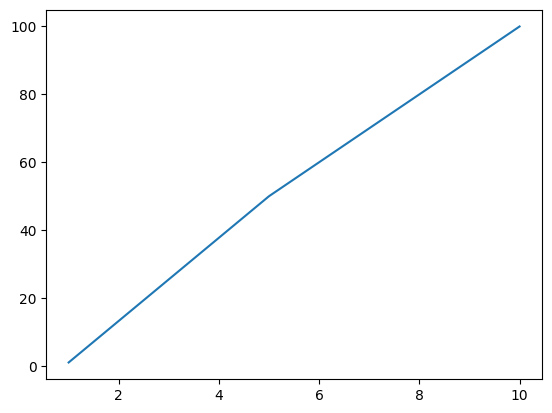

In [25]:
plt.figure()
x_values = [1, 5, 10]
y_values = [1, 50, 100]
plt.plot(x_values, y_values)
plt.show()

The plot is simply three lines drawn between the points at:

* (1, 1)
* (5, 50)
* (10, 100)

We defined the points ourselves for demonstration purposes, but the points will usually come from a dataset, as we will see in a little bit.

First, it is worth noting some basics about matplotlib.

For example, you can choose how to style your plots by setting a style. I like how `ggplot` looks, but you can choose from a large number of built-in styles [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [26]:
plt.style.use("ggplot")

We can see how the previous plot changes its style after choosing to use the `ggplot` style:

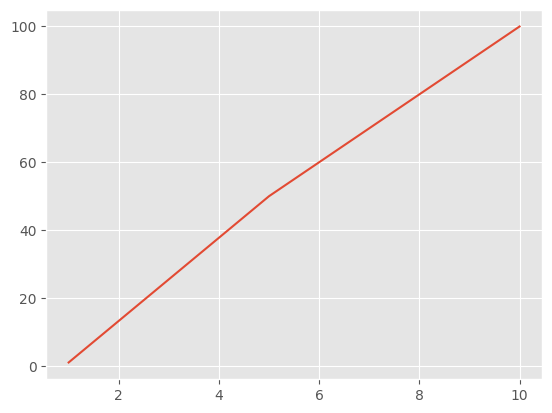

In [27]:
plt.figure()
x_values = [1, 5, 10]
y_values = [1, 50, 100]
plt.plot(x_values, y_values)
plt.show()

We can also add text to our plot like this:

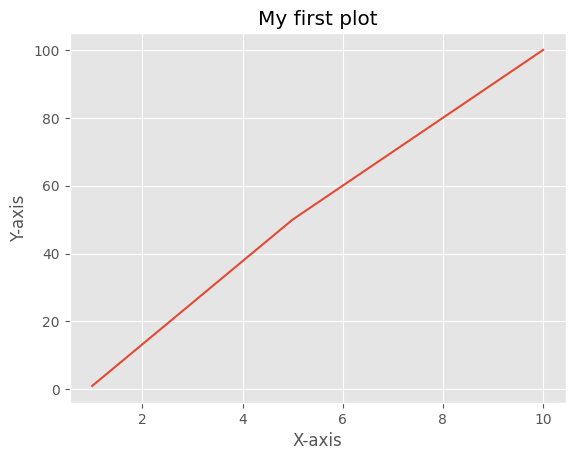

In [28]:
plt.figure()
x_values = [1, 5, 10]
y_values = [1, 50, 100]
plt.plot(x_values, y_values)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("My first plot")
plt.show()

We can create different types of plots.

The matplotlib documentation has a create overview of examples of different kinds of plots that you can create. This is a great place for inspiration and code for how to create similar plots when needed. Check it out [here](https://matplotlib.org/stable/gallery/index.html).

Let's create a bar plot using the `plt.bar` method:

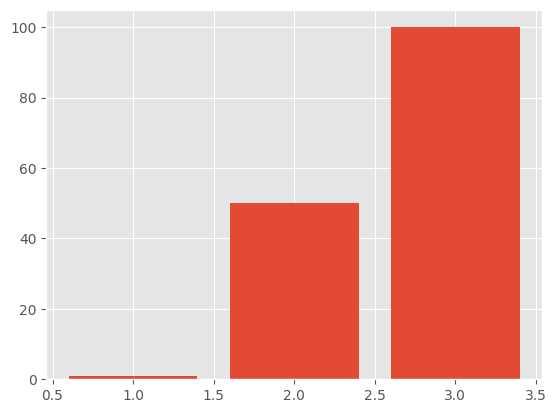

In [29]:
plt.figure()
x_values = [1, 2, 3]
y_values = [1, 50, 100]
plt.bar(x_values, y_values)
plt.show()

We can also create more advanced plots like histograms. (A histogram is a plot that shows the distribution of values.) Let's create a histogram of average book ratings using the `plt.hist` command:

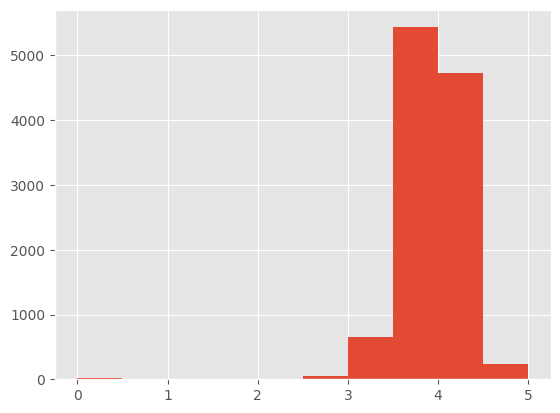

In [30]:
plt.figure()
ratings = books["average_rating"]
plt.hist(ratings)
plt.show()

This shows us that most of the books have an average rating around 4. The histogram bins are quite coarse though. Let us make a bit more fine-grained by increasing the number of bins:

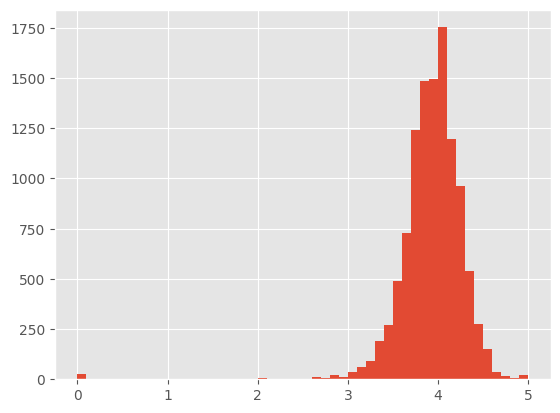

In [31]:
plt.figure()
ratings = books["average_rating"]
plt.hist(ratings, bins=50)
plt.show()

Feel free to experiment and see what happens when you change the number of bins and run the command again.

We can also make the histogram a bit nicer to look at. I personnally tend to like to add a black edge to the bins, so it is easier to distinguish them. It is also nicer to the ones we present our analysis to if we add some text to the histogram. Let's do this:

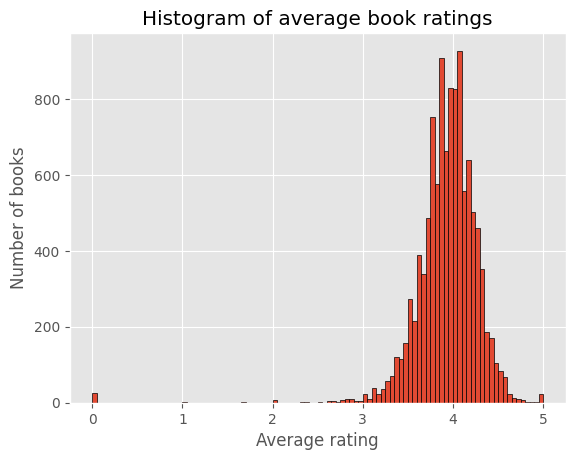

In [33]:
plt.figure()
ratings = books["average_rating"]
plt.hist(ratings, bins=100, edgecolor="black")
plt.xlabel("Average rating")
plt.ylabel("Number of books")
plt.title("Histogram of average book ratings")
plt.show()

Lastly, it is possible to add several different series to your plot.

Let's illustrate this with an example. Let's say that we are interested in knowing how many books are published each year and compare that with how many reviews books get on average during the same years.

We can get find the right data by using `groupby`, `count`, and `mean` in Pandas as we saw earlier:

In [76]:
group_by_year = pd.Grouper(key="publication_date", freq="Y")
group = books_after_1999.groupby(group_by_year)

num_books = group["bookID"].count()
average_num_reviews = group["text_reviews_count"].mean()

In [78]:
group.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
176,412,Gravity's Rainbow,Thomas Pynchon,4.01,0140283382,9780140283389,eng,784,762,213,2000-01-01,Penguin Books
593,1936,Little Women,Louisa May Alcott/Paula Danziger,4.07,0439101360,9780439101363,eng,562,462,45,2000-01-01,Scholastic Paperbacks
2407,8771,When I Feel Angry,Nancy Cote/Cornelia Maude Spelman,3.98,0807588970,9780807588970,eng,24,113,4,2000-01-01,Albert Whitman Company
2922,10814,Here Is New York,E.B. White/Roger Angell/Barbara Cohen/Judith S...,4.30,1892145022,9781892145024,eng,58,5379,544,2000-01-01,Little Bookroom
2930,10873,Shopgirl,Steve Martin,3.43,0786891076,9780786891078,eng,130,30067,2166,2000-01-01,Hachette Books
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,44184,Monster,Walter Dean Myers,3.72,0064407314,9780064407311,eng,281,56171,5341,2019-03-05,Amistad
1070,3638,The Wish Giver: Three Tales of Coven Tree,Bill Brittain/Andrew Glass,3.83,0064401685,9780064401685,eng,192,2201,218,2019-04-02,HarperCollins
10768,43940,Object Thinking,David West,3.99,0735619654,9780735619654,eng,334,155,21,2019-07-23,Microsoft Press
3981,14142,The Art of Loving,Erich Fromm/Peter D. Kramer/Rainer Funk,4.04,0061129739,9780061129735,eng,192,38148,1310,2019-08-06,Harper Perennial Modern Classics


In [80]:
num_books.shape

(21,)

In [81]:
num_books.head()

publication_date
2000-12-31     533
2001-12-31     656
2002-12-31     798
2003-12-31     931
2004-12-31    1069
Freq: A-DEC, Name: bookID, dtype: int64

We can now plot both the "number of published books"-series and the "average number of reviews"-series in the same plot by:

1. Calling `plt.plot` twice (once per series)
2. Calling `plt.legend` to add a legend to the plot

Notice that we add `label` arguments to the `plt.plot` calls. This is necessary and it is used by `plt.legend`.

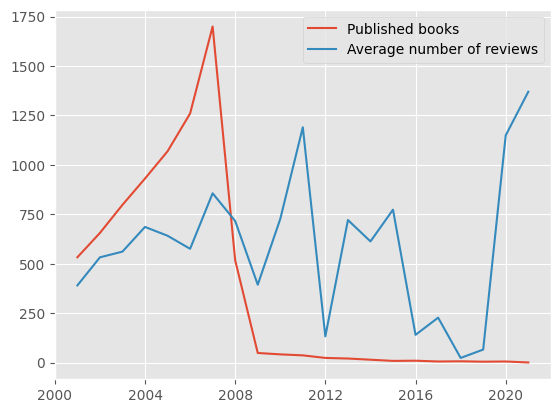

In [35]:
plt.figure()
plt.plot(num_books.index, num_books, label="Published books")
plt.plot(average_num_reviews.index, average_num_reviews, label="Average number of reviews")
plt.legend()
plt.show()

### Exercises

**Exercise 1**

Create a bar plot of the number of books published every year (after 1999).

Tips:

* Use the `num_books` variable that we created a few cells above.
* `num_books` has an `index` property, which can be useful when defining the values on the x-axis.
* Use `plt.bar(..., width=300)` instead of `plt.bar(...)`. The width argument is necessary because the distance between the bars will be 365 days, so we need to have wide bars in order to have them be visible to the human eye.

In [56]:
books_after_1999.groupby(grouper)["bookID"].count()

publication_date
2000-12-31     533
2001-12-31     656
2002-12-31     798
2003-12-31     931
2004-12-31    1069
2005-12-31    1260
2006-12-31    1700
2007-12-31     518
2008-12-31      49
2009-12-31      42
2010-12-31      37
2011-12-31      24
2012-12-31      21
2013-12-31      15
2014-12-31       9
2015-12-31      10
2016-12-31       6
2017-12-31       7
2018-12-31       5
2019-12-31       6
2020-12-31       1
Freq: A-DEC, Name: bookID, dtype: int64

In [37]:
num_books.head()

publication_date
2000-12-31     533
2001-12-31     656
2002-12-31     798
2003-12-31     931
2004-12-31    1069
Freq: A-DEC, Name: bookID, dtype: int64

In [44]:
num_books.shape

(21,)

In [ ]:
(num_books.index, num_books, label="Published books")

<Axes: xlabel='publication_date'>

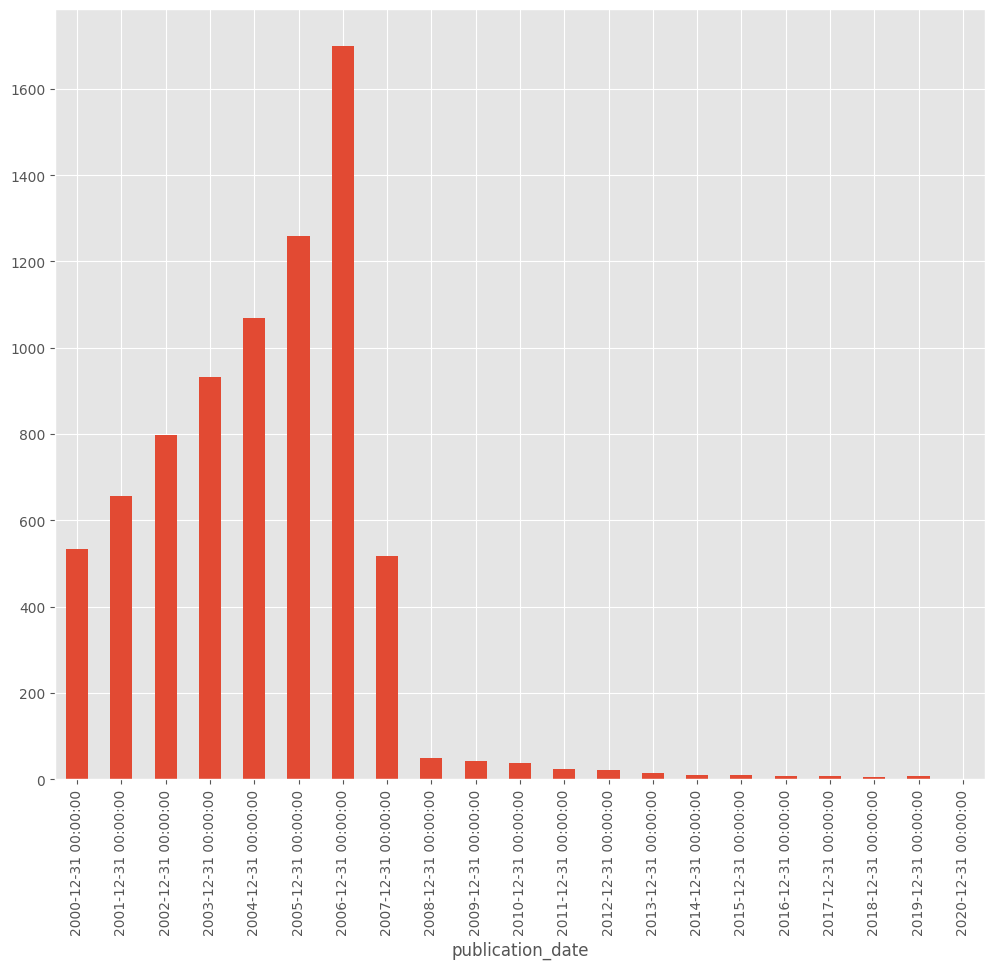

In [91]:
plt.figure(figsize=(12,10))
num_books.plot(kind='bar')

In [92]:
lang_count=books_by_language["bookID"].count()

In [96]:
lang_count.head(20)

language_code
ale         1
ara         1
en-CA       7
en-GB     214
en-US    1408
eng      8907
enm         3
fre       143
ger        99
gla         1
glg         1
grc        11
ita         5
jpn        46
lat         3
msa         1
mul        19
nl          1
nor         1
por        10
Name: bookID, dtype: int64

**Exercise 2**

Create a bar plot of the number of books published for each language.

Tips:

* We know the book language from the "language_code" column.
* The pandas methods `groupby` and `count` are your friends.
* Use `plt.figure(figsize=(20, 5))` instead of `plt.figure()`. The `figsize` arguments tells matplotlib that the plot should be 20 inches wide and 5 inches tall. This is useful because there are a lot of languages, so we need more width to show them all.

(Most languages will have bars that are too low to be visible. That is okay.)

In [98]:
# Do exercise 2 here

In [94]:
lang_count.shape

(27,)

Text(0, 0.5, 'Number of books')

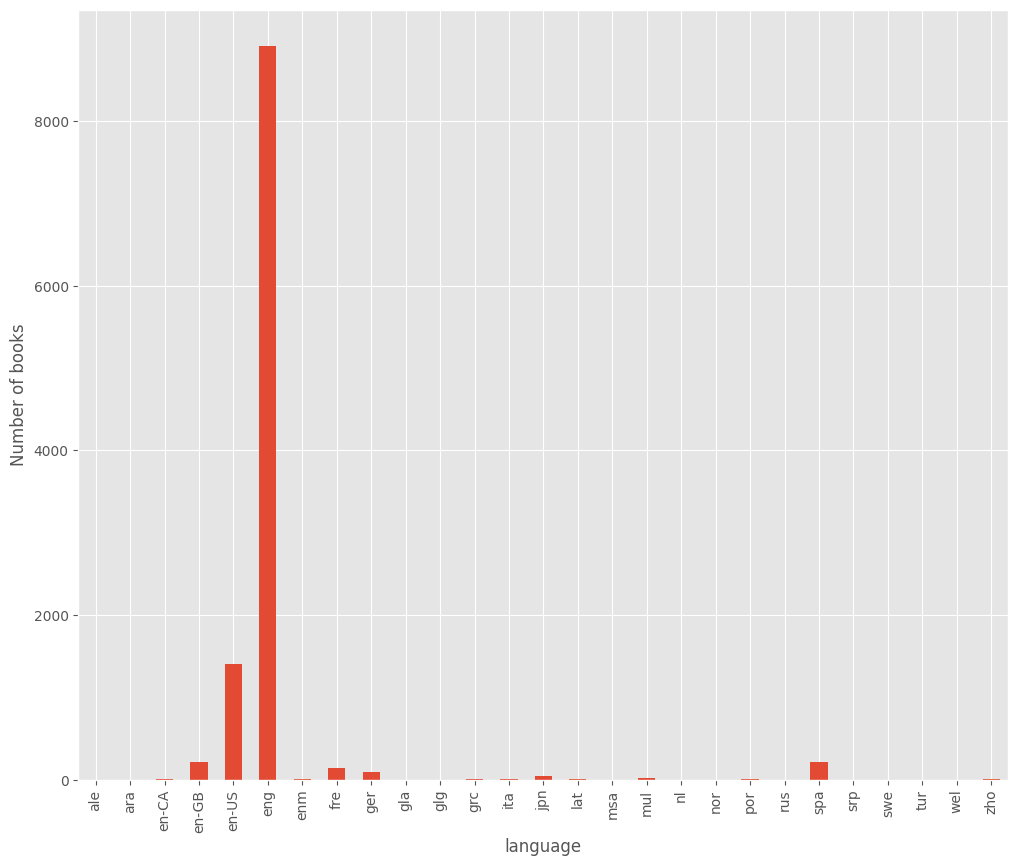

In [100]:
plt.figure(figsize=(12,10))
lang_count.plot(kind='bar')
plt.xlabel("language")
plt.ylabel("Number of books")

# Financial Market Predictions

Now we have a grasp of the tools that we will be using, great!

Let's turn our attention towards what we came for: Financial market predictions (with AI).

(The AI part is at the end 😉 )

In this part we are going to also be using a library called tabulate. It provides a nice little method to display tables, and that is all we are going to use it for.

You can install libraries in notebooks using `!pip install library-name`. If you are from the JavaScript world, then this is the Python equivalent of `!npm install package-name`.

Run the cell below to install:

In [1]:
!pip install tabulate

Let's make sure that we have imported everything that we are going to be needing:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

We are going to explore two datasets for our analysis and predictions. Both datasets are obtained from [this Kaggle page](https://www.kaggle.com/datasets/johnsmith44/dogecoin-price-data-elon-musks-tweets-2021).

The first is a dataset of all the tweets written by Elon Musk in 2021.

Let's start by loading the tweets dataset. Don't mind that I have added some extra arguments to the Pandas `read_csv` method. This is just to ensure that the columns in the dataset are interpreted correctly by Pandas.


In [3]:
url = "https://raw.githubusercontent.com/ChrisFugl/data_science_workshop_2023/main/data/musk_2021_tweets.csv"
tweets = pd.read_csv(
    url,
    parse_dates=["Datetime"],
    dayfirst=True,
    dtype={
        "Tweet Id": pd.Int64Dtype(),
        "Text": str,
    },
)

Let's see what the tweets dataset looks like.

In [4]:
tweets.shape

(2993, 3)

We have 2993 tweets (he sure does tweet a lot) and the table looks like this:

In [5]:
tweets.head(5)

,Datetime,Tweet Id,Text
0,2021-01-01 00:58:00,1344810000000000000,"@PPathole Dojo isn’t needed, but will make sel..."
1,2021-01-02 03:20:00,1345210000000000000,@comma_ai Tesla Full Self-Driving will work at...
2,2021-01-02 12:23:00,1345340000000000000,"@newscientist Um, we have giant fusion reactor..."
3,2021-01-02 14:51:00,1345380000000000000,So proud of the Tesla team for achieving this ...
4,2021-01-02 14:59:00,1345380000000000000,@flcnhvy Tesla is responsible for 2/3 of all t...


You can see that the way Pandas dataframes (tables) are printed in notebooks doesn't work too well for text, because the text gets cut off rather early. That is why we will be using tabulate to show tables. Let's display the same using tabulate:

In [6]:
selected_tweets = tweets.head(5)
selected_tweets = selected_tweets[["Datetime", "Text"]]
table = tabulate(selected_tweets, headers=["Datetime", "Tweet"], showindex=False)
print(table)

Datetime             Tweet
-------------------  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2021-01-01 00:58:00  @PPathole Dojo isn’t needed, but will make self-driving better. It isn’t enough to be safer than human drivers, Autopilot ultimately needs to be more than 10 times safer than human drivers.
2021-01-02 03:20:00  @comma_ai Tesla Full Self-Driving will work at a safety level well above that of the average driver this year, of that I am confident. Can’t speak for regulators though.
2021-01-02 12:23:00  @newscientist Um, we have giant fusion reactor in the sky that works with no maintenance
2021-01-02 14:51:00  So proud of the Tesla team for achieving this major milestone! At the start of Tesla, I thought we had (optimistically) a 10% chance of surviving at all.
2021-01-02 14:59:00  @flcnhvy Tesla is responsible for 2/3 of all the perso

Now we get all of the tweets and can see them in their full extent.

The second dataset is about the price of [DOGEcoin](https://en.wikipedia.org/wiki/Dogecoin) in 2021. DOGEcoin is a cryptocurrency coin that was originally made as a joke, but turned out to gain some real worth in time.

The DOGEcoin logo:

![DOGEcoin logo](https://upload.wikimedia.org/wikipedia/en/thumb/d/d0/Dogecoin_Logo.png/150px-Dogecoin_Logo.png)

We know that Musk has tweeted about DOGEcoin on several occasions. When we consider that, his fame, and large amount of Twitter followers, then it stands to reason that his tweets may affect the price of DOGEcoin to some extent.

**Note**

We will be comparing Musk tweets and DOGEcoin prices as an example of how to do financial market predictions, but you could apply the same kind of analysis and predictions to a lot of other financial data. For example, you could analyse whether company press statements can be used to predict their stock price.

Now, let's load the DOGEcoin dataset:

In [7]:
dogecoin = pd.read_csv(
    "https://raw.githubusercontent.com/ChrisFugl/data_science_workshop_2023/main/data/dogecoin.csv",
    parse_dates=["open_time"],
    dayfirst=True,
    dtype={
        "price": pd.Float64Dtype(),
    },
)

What does the DOGEcoin dataset look like?

In [8]:
dogecoin.shape

(523168, 2)

It has 523,168 rows of information about the DOGEcoin price in 2021. Here is what the first 5 rows look like:

In [9]:
dogecoin.head(5)

,open_time,price
0,2021-01-01 00:00:00,0.004672
1,2021-01-01 00:01:00,0.004673
2,2021-01-01 00:02:00,0.004686
3,2021-01-01 00:03:00,0.004671
4,2021-01-01 00:04:00,0.004676


We know from a description of the dataset that the price column is the price of a single DOGEcoin in USD.

### Exercise

Plot the price of DOGEcoin.

Below is a reference of what your plot should look like. Do not worry if it doesn't look exactly the same. The important part is that the curve looks the same.

Tips:

* We know the time from the "open_time" column.
* We know the price from the "price" column.

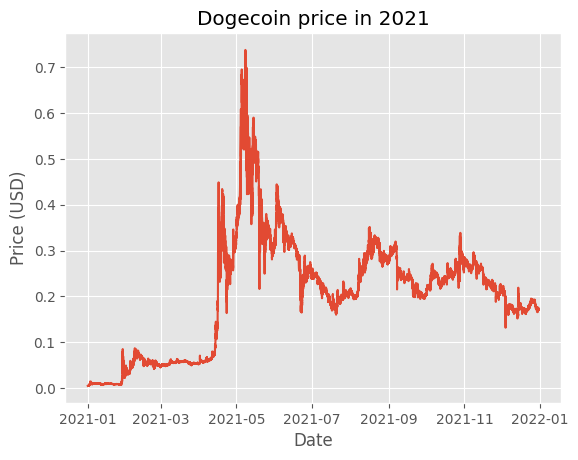

In [18]:
# Do exercise here



<function matplotlib.pyplot.show(close=None, block=None)>

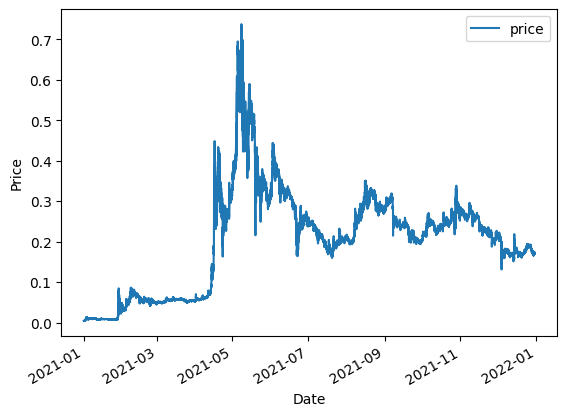

In [16]:
dogecoin.plot(kind='line', x='open_time', y='price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show

## Data Analysis

Before we make an AI to try and predict the price of DOGEcoin from Musk tweets, then let's see if we can find any patterns ourselves.

The first step here is to notice that the DOGEcoin price specifies the price on a per-minute basis. That is probably more fine-grained and noisy than we would like it to be.

Let's make it less noisy by averaging the price of a day:

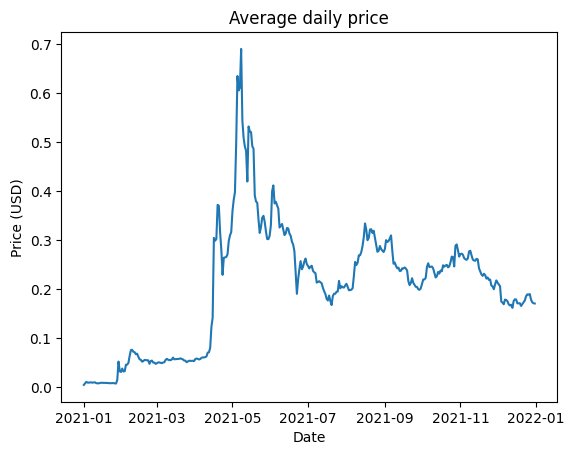

In [19]:
plt.figure()
group_by_day = pd.Grouper(key="open_time", freq="D")
mean_day_price = dogecoin.groupby(group_by_day)["price"].mean()
plt.plot(mean_day_price.index, mean_day_price)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Average daily price")
plt.show()

Now let's use what we have to answer some interesting questions.

For example, which days do prices change the most?

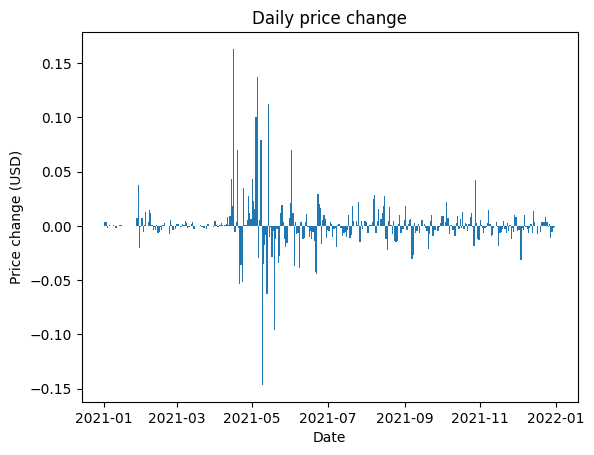

In [20]:
plt.figure()
daily_change = mean_day_price.iloc[1:].values - mean_day_price.iloc[:-1].values
daily_change = pd.Series(daily_change, index=mean_day_price.index[1:])
plt.bar(daily_change.index, daily_change, width=1)
plt.xlabel("Date")
plt.ylabel("Price change (USD)")
plt.title("Daily price change")
plt.show()

It seems that big changes in price are around 0.10 USD. Let's find the days when that happens:

In [21]:
mask = daily_change.abs() >= 0.10
big_changes = daily_change[mask]
big_changes

open_time
2021-04-16    0.162885
2021-05-05    0.136841
2021-05-09   -0.146446
2021-05-14    0.112153
dtype: Float64

This only happens on four days in 2021.

Let's now start looking at what Elon Musk tweeted on the days prior to these.

You can change the index from 0 to 3 to see what he tweeted up to a day prior to the increase on the four days above.

In [22]:
index = 0

days_offset = pd.Timedelta(days=1)
start_date = big_changes.index[index] - days_offset
end_date = big_changes.index[index]
mask = tweets["Datetime"].between(start_date, end_date)
selected_tweets = tweets[mask]

print(f"Tweets between {start_date.date()} and {end_date.date()}:\n")

selected_tweets = selected_tweets[["Datetime", "Text"]]
table = tabulate(selected_tweets, headers=["Datetime", "Tweet"], showindex=False)
print(table)

Tweets between 2021-04-15 and 2021-04-16:

Datetime             Tweet
-------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2021-04-15 03:42:00  ☾

                                🔭𖨆♡
2021-04-15 03:47:00  Le Petit Prince
2021-04-15 04:19:00  @RationalEtienne @F9Block5 While perhaps obvious in hindsight, it turns out that the only way to solve self-driving is to solve a big part of real-world AI. That is what Tesla is doing, both in hardware &amp; software.

                     Unless a company is good at AI with tight compute, it’s hopeless. This is insanely hard.
2021-04-15 04:28:00  @WSBChairman Doge Barking at the Moon – Miro https://t.co/1vTM2XOusy
2021-04-15 04:33:00  Doge Barking at the Moon https://t.co/QFB81D7zOL
2021-04-15 04:38:00  @billhuang688 @RationalEtienne @F9

We see that there is a sign of Musk affecting the price of DOGEcoin, since he was mentioning DOGEcoin on the day before in 2 out of 4 cases where the price changed a lot.

Let's now dig deeper and inspect when Musk is mentioning "doge".

Pandas has (as usual) a nice method to help us with this: [`str.contains`](https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.Series.str.contains.html). This method lets us ask if a text column contains a string. It also lets us specify that we don't care about the casing. That is, we consider it a mention regardless of whether he mentions "doge" or "DOGE".

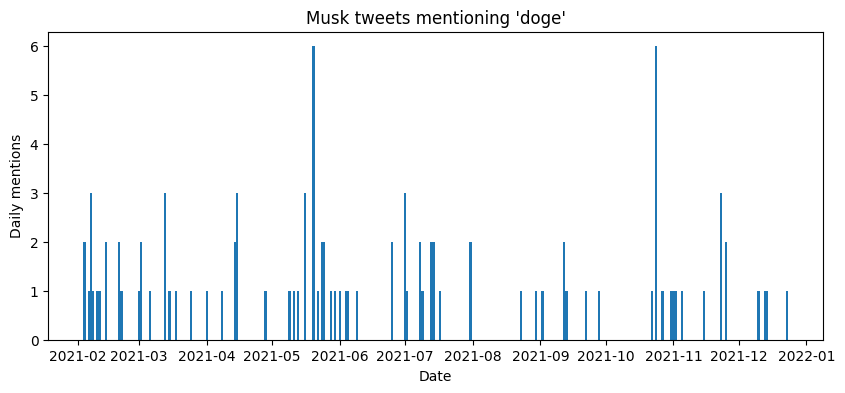

In [23]:
plt.figure(figsize=(10, 4))
mask = tweets["Text"].str.contains("doge", case=False)
doge_tweets = tweets[mask]
group_by_day = pd.Grouper(key="Datetime", freq="D")
daily_doge_tweets = doge_tweets.groupby(group_by_day)["Text"].count()
daily_doge_tweets = daily_doge_tweets[daily_doge_tweets > 0]
plt.bar(daily_doge_tweets.index, daily_doge_tweets, width=1)
plt.xlabel("Date")
plt.ylabel("Daily mentions")
plt.title("Musk tweets mentioning 'doge'")
plt.show()

Now let's see what happens when we overlap his mentions with the DOGEcoin price.

We are going to use matplotlib's method `plt.axvline` to draw vertical lines on specific places on the x-axis. These lines will indicate whether Musk mentioned "doge" in his tweets on that day.

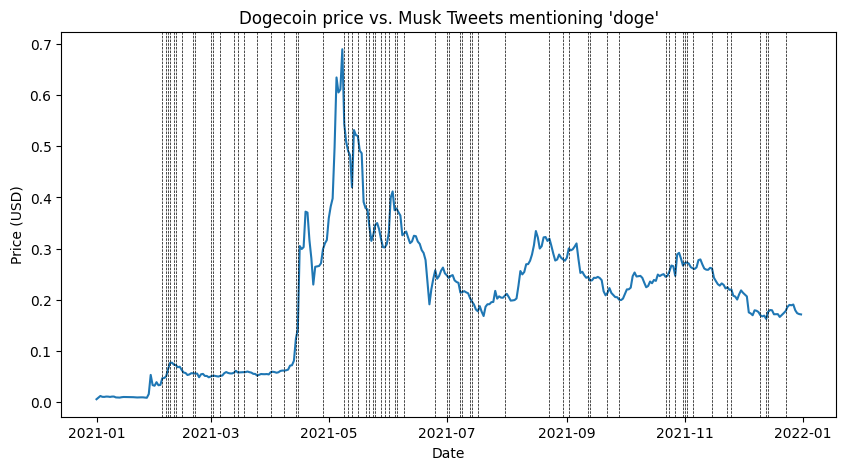

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(mean_day_price.index, mean_day_price)
for date in daily_doge_tweets.index:
    plt.axvline(date, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Dogecoin price vs. Musk Tweets mentioning 'doge'")
plt.show()

### Exercise

Something interesting is happening around April to July. Let's take our plot from above and zoom in on our region of interest.

Tips:

* You can use `plt.xlim` to tell matplotlib what interval of the x-axis it should show.
* `plt.xlim` accepts timestamps as inputs and is called as `plt.xlim(start, end)`.
* Use `pd.Timestamp` to create a timestamp. For example, `pd.Timestamp("1970-01-31")` is a timestamp for January 31st, 1970.

Here is a reference of what your plot should look like:

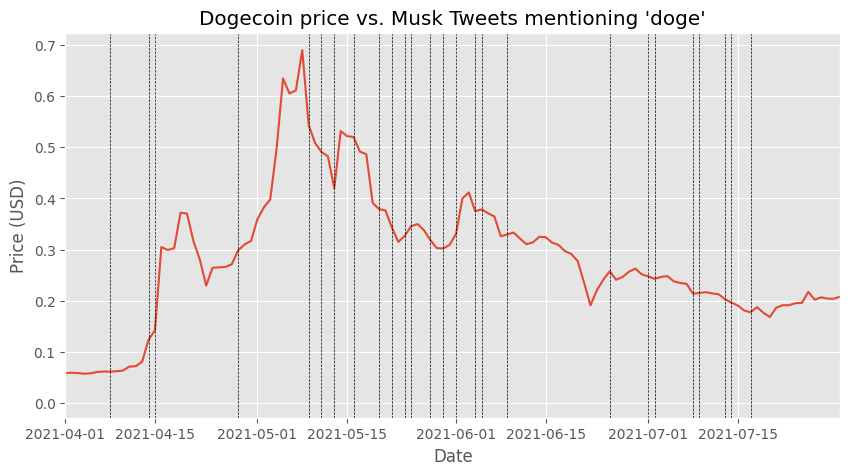

In [ ]:
# Do exercise here


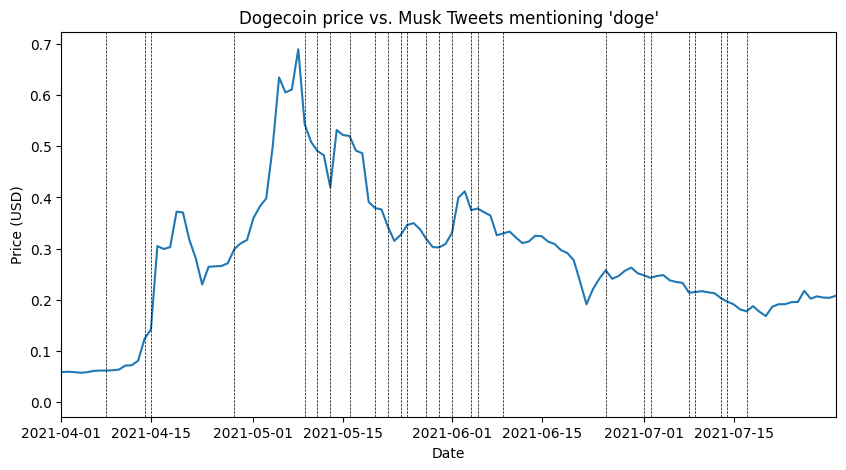

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(mean_day_price.index, mean_day_price)
for date in daily_doge_tweets.index:
    plt.axvline(date, color="black", linestyle="--", linewidth=0.5)
min_date = pd.Timestamp("2021-04-01")
max_date = pd.Timestamp("2021-07-31")
plt.xlim(min_date, max_date)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Dogecoin price vs. Musk Tweets mentioning 'doge'")
plt.show()

As the final part of our analysis, let's look at what Musk actually said about DOGEcoin on these dates:

In [30]:
min_date = pd.Timestamp("2021-04-01")
max_date = pd.Timestamp("2021-07-31")
mask = tweets["Datetime"].between(min_date, max_date) & tweets["Text"].str.contains("doge", case=False)

selected_tweets = tweets[mask]
selected_tweets = selected_tweets[["Datetime", "Text"]]
table = tabulate(selected_tweets, headers=["Datetime", "Tweet"], showindex=False)
print(table)

Datetime             Tweet
-------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2021-04-01 10:25:00  SpaceX is going to put a literal Dogecoin on the literal moon
2021-04-08 20:45:00  @dogeofficialceo @WatchersTank @SpaceX Looking at pups soon!
2021-04-14 22:19:00  @dogeofficialceo @F9Block5 🤣🤣
2021-04-14 22:32:00  @AstroJordy @dogeofficialceo @F9Block5 Insanely cute!
2021-04-15 04:28:00  @WSBChairman Doge Barking at the Moon – Miro https://t.co/1vTM2XOusy
2021-04-15 04:33:00  Doge Barking at the Moon https://t.co/QFB81D7zOL
2021-04-15 21:10:00  @sadiaslayy @DogecoinBets 😮
2021-04-28 06:20:00  The Dogefather
                     SNL May 8
2021-05-09 22:41:00  SpaceX launching satellite Doge-1 to the moon next year

                     – Mission paid for in Doge
                     – 1st crypto in space
                   

Funny enough, we see that he had a tweet on April 28th, and the price of DOGEcoin sparked following this. The tweet was simply him calling himself the "The Dogefather" while teasing for a SNL appearance. This incident was actually mentioned in [some news medias](https://www.marketwatch.com/story/elon-musk-dubs-himself-the-dogefather-in-snl-promo-tweet-prompting-real-people-to-invest-actual-money-in-joke-crypto-11619633399).

Feel free to play around with the datasets after the workshop. What other questions can you think of that you would like to investigate?

## Let's make an AI 🤖

Our analysis has shown that there are indeed cases where Musk tweets about DOGEcoin and so affects the price of it.

This is encouraging to us, because it suggests that perhaps an AI could learn to predict the change in DOGEcoin price somewhat well, based on what Musk is tweeting.

Naturally, what Musk tweets isn't the only factor in determining the price of DOGEcoin, so we do not expect our AI to be able to predict anywhere near perfect, but we have reason to expect that it should be able to predict rough trends.

Before we get started, let us talk about which libraries that we will be using.

Our main library is PyTorch, which is a very popular deep learning framework to help us create, train, and use neural networks. Whenever you see a news article about "Big company released new Large Language Model (LLM)", then there is a high probability that they used PyTorch to make the LLM.

See the PyTorch documentation [here](https://pytorch.org/docs/stable/index.html).

Let's import PyTorch:

In [31]:
import torch

Our second library will be Hugging Face transformers.

A Transformer is a kind of neural network that is ubiquitous nowadays. I dare say that every single LLM (including ChatGPT) that you hear about, is some kind of Transformer.

Hugging Face transformers (🤗 transformers) is all about Transformers. It provides a large variety of different Transformers that researchers have made available for us to use free of charge. You can think of it as a free app store for neural networks.

You can go to [this page](https://huggingface.co/models) to search amongst more than 300,000 different Transformer models for a large range of different tasks.

You can also go to [this page](https://huggingface.co/docs/transformers/main_classes/model) to see all of the different kinds of Transformer models that they support.

🤗 transformers is not yet installed in our notebook, so we will need to install it ourself:

In [32]:
!pip install transformers

Let's now import what we will be needing from 🤗 transformers:

In [33]:
from transformers import BertTokenizer
from transformers import BertForSequenceClassification

Now that we got the tooling in place, then our first step on the journey of creating an AI, is to designate a part of our dataset for training the AI and another part for testing it.

We make this distinction because the AI will have seen the training part of the dataset and can therefore not be used to reliably measure how well it is performing.

We designate the first half of 2021 for training and the latter half for testing:

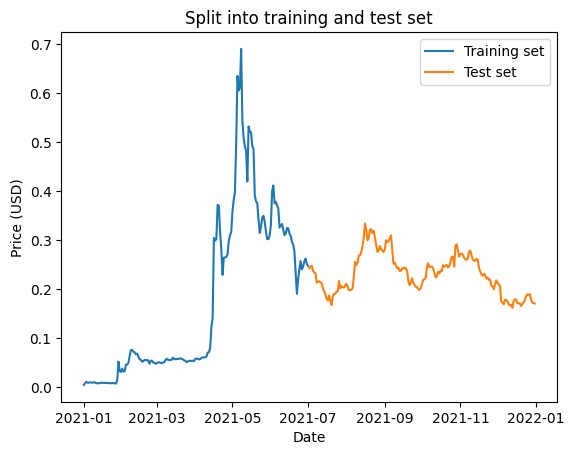

In [34]:
plt.figure()

mid_index = len(mean_day_price) // 2
training_prices = mean_day_price.iloc[:mid_index]
test_prices = mean_day_price.iloc[mid_index:]

plt.plot(training_prices.index, training_prices, label="Training set")
plt.plot(test_prices.index, test_prices, label="Test set")

plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Split into training and test set")
plt.legend()

plt.show()

We can see that the training and test sets have very different characteristics, so it will be difficult for the AI to learn to predict the test set based on the training set. Nevertheless, we will give it a try!

Our next step is to figure out what exactly we want the AI to learn.

A simple idea could be to predict the price of DOGEcoin the following day that a tweet is made. However, this may cause some trouble because it usually takes more than a day from the time a tweet is made, to the time that we can see a change in the price.

We could instead try to predict the price 3 days in the future of when a tweet is made. This guess seems reasonable, so we are going to try it.

We are also going to make an additional change to what the AI will learn: We know from our analysis that the price can change rapidly from day to day. This may make it difficult to predict the exact price of a given day. We will try to mitigate this by learning to predict the average price of 2, 3, and 4 days into the future. Hopefully, this should provide a useful learning goal for the AI.

Finally, we are not only going to be looking at a single tweet, but at all of the tweets made within a given day.

Let's create the inputs and targets for this learning goal:

In [35]:
price_days_offset = 3  # Predict 3 days into the future
price_days_interval = 1  # Average price from 2, 3, and 4 days in the future

# Join all tweets per day

def join_tweets(tweets):
  return "\n".join(tweets)


group_tweets_by_day = pd.Grouper(key="Datetime", freq="D")
tweets_per_day = tweets.groupby(group_tweets_by_day)["Text"].apply(join_tweets)

# Find the daily price

group_price_per_day = pd.Grouper(key="open_time", freq="D")
price_per_day = dogecoin.groupby(group_price_per_day)["price"].mean()

dates = []
inputs = []
targets = []

end_index = len(tweets_per_day) - price_days_offset
for day_index in range(end_index):
  date = tweets_per_day.index[day_index]
  dates.append(date)

  text = tweets_per_day.iloc[day_index]
  inputs.append(text)

  # Find the average price of DOGEcoin 2, 3, and 4 days into the future
  future_index = day_index + price_days_offset
  interval_start = future_index - price_days_interval
  interval_end = future_index + price_days_interval
  future_price = price_per_day.iloc[interval_start:interval_end + 1].mean()

  # Use the difference between the average from above and the current price as the target
  current_price = price_per_day.iloc[day_index]
  price_change = future_price - current_price
  targets.append(price_change)

# Split inputs and targets into training and test parts
training_inputs = inputs[:mid_index]
training_targets = targets[:mid_index]

test_inputs = inputs[mid_index:]
test_targets = targets[mid_index:]

Let's inspect our inputs and targets:

In [36]:
print(inputs[100])

@itsALLrisky 🤣🤣
The art In Cyberpunk is incredible
@agnostoxxx @CathieDWood @ARKInvest Trust the shrub
Love this beautiful shot
@vincent13031925 For now. Costs are decreasing rapidly.


In [37]:
print(targets[100])

0.04439862152777778


It is now time to specify the Transformer that we will be using from Hugging Face. We are going to use something called BERT (short for Bidirectional Encoder Representations from Transformers). It is a very common Transformer model when working with text in English.

The Hugging Face ID is *bert-base-cased* and you can see a description of BERT on [its Hugging Face page](https://huggingface.co/bert-base-cased).

In [38]:
model_id = "bert-base-cased"

Fun fact: This model has 109 million parameters. While that is about a 1000 times smaller than the enormous 175 billion parameter size of ChatGPT, then this is still a fairly large model.

The first thing from the model that we will get is the tokenizer. The tokenizer is the algorithm that will divide words into what we call tokens.

But wait, what is a token in the first place?

A token is a word or a part of a word. For example, we might want to divide the word "being" into two tokens: "be" and "ing". This way we can separate the standard form of the verb and its suffix that indicates the tense.

Let's see this happening with an example. First we will need to load the tokenizer from Hugging Face:

In [39]:
tokenizer = BertTokenizer.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Now, see what happens when we tokenize the sentence "Tokenization is used in AI.", using the tokenizer that we downloaded:

In [40]:
sentence = "Tokenization is used in AI."
tokens = tokenizer(sentence, add_special_tokens=False)
tokenizer.convert_ids_to_tokens(tokens["input_ids"])

['To', '##ken', '##ization', 'is', 'used', 'in', 'AI', '.']

We see that the tokenizer decided to split the word "Tokenization" into three tokens: "To", "ken", and "ization". Notice especially the last token ("ization"). This is the ending of [so many words](https://www.thefreedictionary.com/words-that-end-in-ization) (e.g. familiarization, civilization, etc.), so it is useful to have a token for all of those endings.

Transformers have what is called a context window. A context window is the maximum number of tokens that it can look at per example. There are technical reasons (mostly because of speed and memory usage) for why a context window is there in the first place.

Ideally, we would like to not be limited by a context window, but that is unfortunately infeasible. We have to make sure that most of our inputs are within the context window of the Transformer that we will be using, which has a context window of 512 tokens.



Let's make a histogram of the number of tokens in our inputs:

Token indices sequence length is longer than the specified maximum sequence length for this model (759 > 512). Running this sequence through the model will result in indexing errors


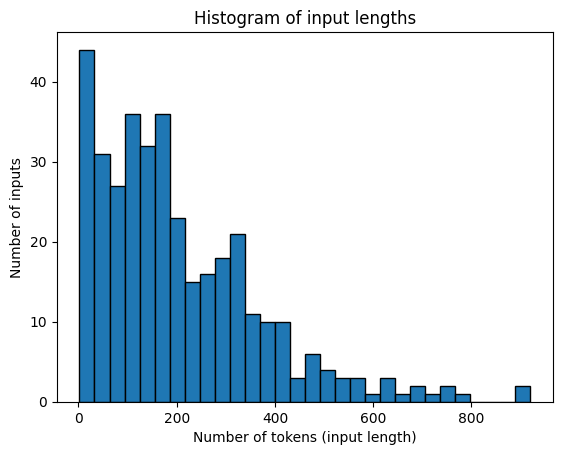

In [41]:
plt.figure()
num_words = [len(text.split()) for text in inputs]
tokens = [tokenizer(text)["input_ids"] for text in inputs]
num_tokens = [len(t) for t in tokens]
plt.hist(num_tokens, bins=30, edgecolor="black")
plt.xlabel("Number of tokens (input length)")
plt.ylabel("Number of inputs")
plt.title("Histogram of input lengths")
plt.show()

Fortunately, most of our inputs can fit within our Transformer's context window 🥳

Neural networks (including Transformers) are very slow on CPUs, but blazingly fast on GPUs. We can tell PyTorch to use the GPU by specyfing which device to use. We will check whether a GPU is available and use that if it is:

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

It is now time to setup our inputs and targets in a format that PyTorch knows how to work with.

In [43]:
# PyTorch uses Dataset to allow accessing any part of our inputs/targets in an easy manner.
# We could also do some preprocessing here, if we desired to do so, but that is not needed in this case.

class Dataset(torch.utils.data.Dataset):
  def __init__(self, inputs, targets):
    super().__init__()
    self.inputs = inputs
    self.targets = targets

  def __len__(self):
    return len(self.inputs)

  def __getitem__(self, index):
    return self.inputs[index], self.targets[index]

# PyTorch uses collator to combine several outputs of Dataset into a batch.
# A batch contains all of the values that the model needs in a format that is highly efficient to work with.

def collator(batch):
  inputs, targets = zip(*batch)

  tokenized_inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True)
  for key, value in tokenized_inputs.items():
    tokenized_inputs[key] = value.to(device)
  targets = torch.tensor(targets).to(device)

  return tokenized_inputs, targets

# Data loaders are the glue that combines Dataset and collator.
# We create separate data loaders for the training and test sets.

batch_size = 9  # Use 9 inputs and targets in every training step

training_dataset = Dataset(training_inputs, training_targets)
training_dataloader = torch.utils.data.DataLoader(
    training_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collator,
)

test_dataset = Dataset(test_inputs, test_targets)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    collate_fn=collator,
)

Training a neural network requires that you define what it needs to learn. You define that through what is called a loss function. When we train a neural network, what we are actually doing is to find some network parameters that make the loss function as small as possible.

It is okay if this part is hard to understand. I recommend to use some of the ressources towards the bottom if you want to learn more about machine learning and AI more generally.

In our particular case, we will be using a loss function called the *mean squared error*. This is often a good choice of loss function when you want to learn to predict a number, like we are doing here.

In [44]:
def loss(predictions, labels):
  error = predictions - labels
  squared_error = error * error
  mean_squared_error = squared_error.mean()
  return mean_squared_error

Now we get to the really exciting part.

We are going to train our very own AI!



In [45]:
# We train the model by letting it learn from the training set 10 times (epochs).

epochs = 5

# The learning rate defines how fast the model learns.
# Higher learning rate gives faster learning, but there is a catch:
# Learning may become unstable, and perhaps not even learn it all, if we set it too high.
# There is no way of knowing what a good learning rate is in advance.
# You just have to try and see what works, but you get good a guessing a fitting learning rate
# as you get more experience with training neural networks.
# A learning rate of 10^-4 works well enough in this case.
learning_rate = 1e-4

# There is a lot of randomness involved in training a neural network.
# We can ensure that a training always does the same by setting a seed.
torch.manual_seed(1)

# This is our Transformer (BERT).
# We load it from Hugging Face using the from_pretrained method.
model = BertForSequenceClassification.from_pretrained(model_id, num_labels=1)
_ = model.to(device)

# The optimizer is what will do the actual learning.
# It is going to update the network parameters at every training step.
# Explaining how this works is difficult without getting mathmatical:
# In brief, it does so by following the gradient, which is found based on the loss function.
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

# Here we do the "training loop".
# It goes through the training set a number of times (specified by the epochs variable).
# Every time it does so, we ask the optimizer to try and make the loss smaller.

model.train()
training_step = 0
losses = []
for epoch in range(epochs):
  for batch_index, batch in enumerate(training_dataloader):

    batch_inputs, batch_targets = batch

    # Use model to predict the targets
    predictions = model(**batch_inputs).logits

    # Use predictions and targets to calculate the loss
    loss_value = loss(predictions, batch_targets)

    # Try and minimise the loss using the optimizer
    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad()

    losses.append(loss_value.cpu().item())

    if training_step % 10 == 0:
      # Log our progress so we can see whether the model is actually learning
      average_loss = sum(losses[-10:]) / 10
      print(f"Epoch {epoch}, batch {batch_index}: {average_loss:.4f}")

    training_step += 1

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 0, batch 0: 0.0029
Epoch 0, batch 10: 0.0728
Epoch 0, batch 20: 0.0132
Epoch 1, batch 9: 0.0106
Epoch 1, batch 19: 0.0072
Epoch 2, batch 8: 0.0064
Epoch 2, batch 18: 0.0073
Epoch 3, batch 7: 0.0054
Epoch 3, batch 17: 0.0069
Epoch 4, batch 6: 0.0072
Epoch 4, batch 16: 0.0039


We can plot the value of the loss throughout the training to get an idea of how well it learned. This is what we call a learning curve:

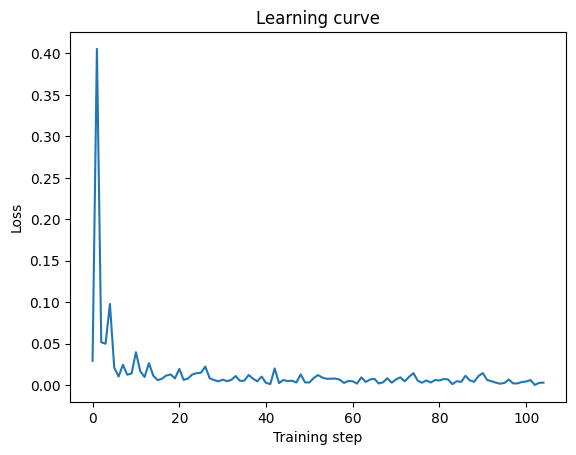

In [46]:
plt.figure()
x_values = range(len(losses))
plt.plot(x_values, losses)
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.title("Learning curve")
plt.show()

The moment of truth is upon us. It is time to test how well (and whether) our AI can actually predict the price of DOGEcoin.

Recall, that we designated the latter half of 2021 for testing. We will now use our AI to predict the price on every day in the test set, and compare the predictions to the actual price during that time.

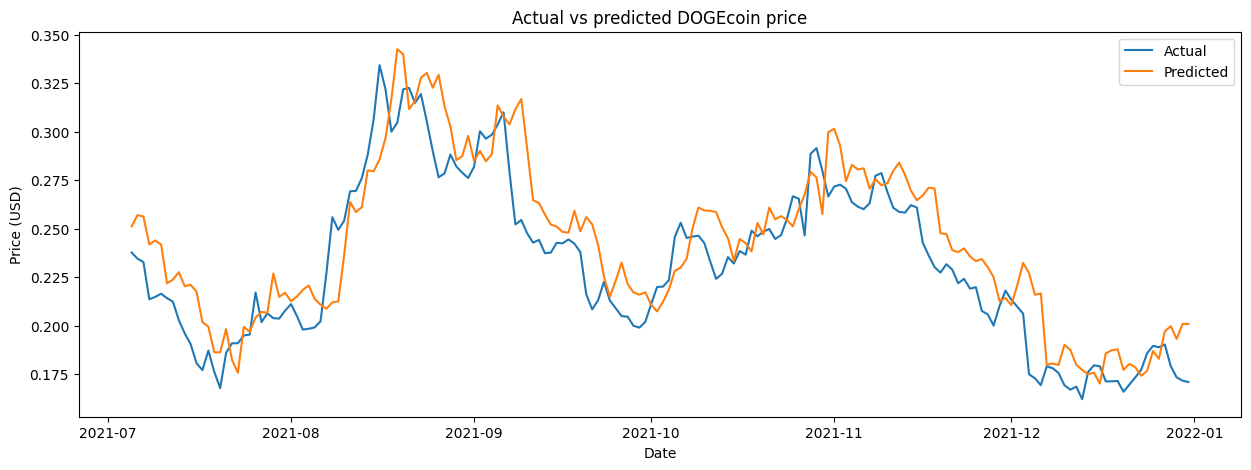

In [47]:
# We loop over all inputs in the testset.
model.eval()
predictions = []
for batch in test_dataloader:
    batch_inputs, _ = batch

    # This is where the model makes the predictions.
    with torch.no_grad():
      prediction = model(**batch_inputs).logits

    # Save the prediction in our "predictions" list.
    prediction = prediction.cpu().item()
    predictions.append(prediction)

# Compare the predicted and actual price in a plot:

offset = pd.Timedelta(days=price_days_offset)
test_start_date = dates[mid_index] + offset

mask = price_per_day.index >= test_start_date
test_price_per_day = price_per_day[mask]

mask = price_per_day.index >= dates[mid_index]
price_offsets = price_per_day[mask]
price_offsets = price_offsets.iloc[:-price_days_offset]
predicted_prices = price_offsets + pd.Series(predictions, index=price_offsets.index)

plt.figure(figsize=(15, 5))
plt.plot(test_price_per_day.index, test_price_per_day, label="Actual")
plt.plot(test_price_per_day.index, predicted_prices, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Actual vs predicted DOGEcoin price")
plt.legend()
plt.show()

Our AI is doing reasonably well. It is far from perfect, but that is in line with what we expected.

# Want to know or do more?

There are a ton of free and high quality material on the internet, when it comes to learn about data science. It can be daunting to know where to begin though.

When I started learning about machine learning, then I found the free online class by Andrew Ng to be a great start.

You can find his introductory class on machine learning [here](https://www.coursera.org/specializations/machine-learning-introduction).

He also a has class about [deep learning](https://www.coursera.org/specializations/deep-learning) (and even more specialised topics within AI) if you really want to deep into the topic.

Coursera (the platform that hosts his classes) also has classes on a huge variety of other topics. You could, for example, take a class on Python programming, if you are new to the language.

I would also recommend to try out [Kaggle](https://www.kaggle.com/) to get some fun experience. Kaggle let's you explore and work with a lot of datasets. In fact, the datasets we worked with today were found from Kaggle. What is more, other users will show their analysis and solutions, which can be a fun way to get inspired by what other people are doing.